# Arthena

In [27]:
import pandas as pd
import os
import numpy as np
from datetime import datetime

In [2]:
wdir = os.getcwd()
picasso_file = os.path.join(wdir, "artists", "picasso.csv")
data = pd.read_csv(picasso_file)

In [3]:
data.head()

,artist_name,artist_nationality,artist_birth_year,artist_death_year,auction_house,auction_sale_id,auction_department,auction_location,auction_date,auction_currency,...,work_execution_year,work_dimensions,work_height,work_width,work_depth,work_measurement_unit,hammer_price,buyers_premium,estimate_low,estimate_high
0,Pablo Picasso,Spanish,1881,1973,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,...,1961,10 x 12 7/8 x 1 in (25.5 x 32.8 x 2.5 cm),25.5,32.8,2.5,cm,-1,0,1000,1500
1,Pablo Picasso,Spanish,1881,1973,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,...,1968,8 5/8 x 8 5/8 in (21.8 x 21.8 cm),21.8,21.8,-1.0,cm,-1,0,3000,4000
2,Pablo Picasso,Spanish,1881,1973,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,...,1956,7 7/8 x 7 7/8 in (20 x 20 cm),20.0,20.0,-1.0,cm,-1,0,6000,8000
3,Pablo Picasso,Spanish,1881,1973,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,...,1956,7 7/8 x 7 7/8 in (20.1 x 20.1 cm),20.1,20.1,-1.0,cm,-1,0,6000,8000
4,Pablo Picasso,Spanish,1881,1973,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,...,1956,16 7/8 in (42.8 cm),-1.0,-1.0,-1.0,cm,-1,0,4000,6000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 28 columns):
artist_name              8386 non-null object
artist_nationality       8386 non-null object
artist_birth_year        8386 non-null int64
artist_death_year        8386 non-null int64
auction_house            8386 non-null object
auction_sale_id          8386 non-null object
auction_department       8386 non-null object
auction_location         8386 non-null object
auction_date             8386 non-null object
auction_currency         8386 non-null object
exchange_rate_to_usd     8386 non-null float64
auction_lot_count        8386 non-null int64
lot_id                   8386 non-null object
lot_place_in_auction     8386 non-null int64
lot_description          8386 non-null object
lot_link                 7307 non-null object
work_title               8326 non-null object
work_medium              8386 non-null object
work_execution_year      8386 non-null int64
work_dimensions        

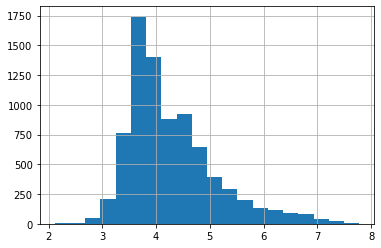

In [12]:
log_hammer = np.log10(data["hammer_price"])
pd.Series(log_hammer).hist(bins=20)

In [13]:
data.columns

Index(['artist_name', 'artist_nationality', 'artist_birth_year',
       'artist_death_year', 'auction_house', 'auction_sale_id',
       'auction_department', 'auction_location', 'auction_date',
       'auction_currency', 'exchange_rate_to_usd', 'auction_lot_count',
       'lot_id', 'lot_place_in_auction', 'lot_description', 'lot_link',
       'work_title', 'work_medium', 'work_execution_year', 'work_dimensions',
       'work_height', 'work_width', 'work_depth', 'work_measurement_unit',
       'hammer_price', 'buyers_premium', 'estimate_low', 'estimate_high'],
      dtype='object')

In [17]:
data.filter(regex="lot").head()

,auction_lot_count,lot_id,lot_place_in_auction,lot_description,lot_link
0,123,13,13,"\n The complete book, c...",http://www.sothebys.com/en/auctions/ecatalogue...
1,123,19,19,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...
2,123,20,20,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...
3,123,21,21,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...
4,123,22,22,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...


In [21]:
data[["exchange_rate_to_usd"]].describe()

,exchange_rate_to_usd
count,8386.000000
mean,1.274233
std,0.327249
min,0.127416
25%,1.000000
50%,1.000000
75%,1.531781
max,2.066130


In [22]:
data.select_dtypes(include=[np.number]).head()

,artist_birth_year,artist_death_year,exchange_rate_to_usd,auction_lot_count,lot_place_in_auction,work_execution_year,work_height,work_width,work_depth,hammer_price,buyers_premium,estimate_low,estimate_high
0,1881,1973,1.0,123,13,1961,25.5,32.8,2.5,-1,0,1000,1500
1,1881,1973,1.0,123,19,1968,21.8,21.8,-1.0,-1,0,3000,4000
2,1881,1973,1.0,123,20,1956,20.0,20.0,-1.0,-1,0,6000,8000
3,1881,1973,1.0,123,21,1956,20.1,20.1,-1.0,-1,0,6000,8000
4,1881,1973,1.0,123,22,1956,-1.0,-1.0,-1.0,-1,0,4000,6000


In [23]:
data.select_dtypes(exclude=[np.number]).head()

,artist_name,artist_nationality,auction_house,auction_sale_id,auction_department,auction_location,auction_date,auction_currency,lot_id,lot_description,lot_link,work_title,work_medium,work_dimensions,work_measurement_unit
0,Pablo Picasso,Spanish,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,13,"\n The complete book, c...",http://www.sothebys.com/en/auctions/ecatalogue...,"Picasso: Toreros (B. 1014-1017; M. 346, 348-35...",print,10 x 12 7/8 x 1 in (25.5 x 32.8 x 2.5 cm),cm
1,Pablo Picasso,Spanish,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,19,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...,Visage Au Trait Oblique (Alain Ramie 587),painting,8 5/8 x 8 5/8 in (21.8 x 21.8 cm),cm
2,Pablo Picasso,Spanish,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,20,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...,Masque (A.R. 311),painting,7 7/8 x 7 7/8 in (20 x 20 cm),cm
3,Pablo Picasso,Spanish,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,21,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...,Masque (A.R. 310),painting,7 7/8 x 7 7/8 in (20.1 x 20.1 cm),cm
4,Pablo Picasso,Spanish,Sothebys,N09963,Decorative Arts,New York,2018-12-06T19:00:00.928000,USD,22,\n <em>Terre de faïence...,http://www.sothebys.com/en/auctions/ecatalogue...,Horloge A La Langue (A.R. 327),painting,16 7/8 in (42.8 cm),cm


In [24]:
data['auction_location'].value_counts()

New York     4054
London       3378
Paris         670
Milan         167
Amsterdam      94
Hong Kong      17
Online          5
Shanghai        1
Name: auction_location, dtype: int64

In [29]:
(pd.to_datetime(data['auction_date']) - datetime(2005,1,1)).apply(lambda x: x.days / 365)

11.101370    280
5.895890     151
12.816438    145
4.827397     142
8.216438     142
            ... 
5.684932       1
13.876712      1
2.416438       1
12.498630      1
4.093151       1
Name: auction_date, Length: 436, dtype: int64

In [30]:
data['work_medium'].value_counts()

print              3285
decorative arts    2348
painting           1358
drawing             637
color drawing       300
watercolor          150
photograph          121
sculpture           114
pastel               62
poster               11
Name: work_medium, dtype: int64

In [36]:
data['auction_lot_count'].value_counts()

-1      1167
 151     187
 396     145
 119     136
 107     133
        ... 
 30        1
 424       1
 27        1
 253       1
 541       1
Name: auction_lot_count, Length: 273, dtype: int64